In [41]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [42]:
id_dtype = np.dtype(
    [
        ("run_id", np.uint32),
        ("sub_run_id", np.uint32),
        ("event_id", np.uint32),
        ("sub_event_id", np.uint32),
    ]
)
map_dtype = np.dtype(
    [
        ("id", id_dtype),
        ('raw', np.uint32),
        ('st_raw', np.uint32,(3)),
        ('pulses', np.uint32),
        ('st_pulses', np.uint32,(3)),
        ('cal', np.uint32),
        ('st_cal', np.uint32,(3)),
        ('hlc', np.uint32),
        ('st_hlc', np.uint32,(3)),
        ('slc', np.uint32),
        ('st_slc', np.uint32,(3))
    ]
)

In [47]:
data_t = np.load('/home/dup193/work/double_pulse/NuTAU_Make_Image_TEST_temp.npz')['arr_0']
data_m = np.load('/home/dup193/work/double_pulse/NuMU_Make_Image_TEST_temp.npz')['arr_0']
data_e = np.load('/home/dup193/work/double_pulse/NuE_Make_Image_TEST_temp.npz')['arr_0']

In [48]:
print(data_t[data['id']['event_id']==680])

[((1, 4294967295, 680, 0), 63, [13,  7,  3], 63, [13,  7,  3], 63, [13,  7,  3], 17, [11,  6,  0], 46, [2, 1, 3])
 ((9, 4294967295, 680, 0), 97, [12,  9,  8], 97, [12,  9,  8], 97, [12,  9,  8], 48, [11,  9,  8], 51, [1, 0, 2])]


In [63]:
print(data_t['hlc'][:,0])
print(data_m['hlc'][:,0])
print(data_e['hlc'][:,0])

[177  88  58 ...  90  69 122]
[243 124 365 ... 178 271 160]
[ 89  55 136 ...  77 103 122]


In [83]:
def Plot(Name,Label,data_t,data_m,data_e,xscale='linear',b =100,r =[0,1000], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    weights_t = np.ones(data_t.shape[0])/data_t.shape[0]
    weights_m = np.ones(data_m.shape[0])/data_m.shape[0]
    weights_e = np.ones(data_e.shape[0])/data_e.shape[0]

    #ax.set_xscale(xscale)
    #ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.74,'#EventsT '+str(len(data_t)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.84,'#EventsM '+str(len(data_m)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.94,'#EventsE '+str(len(data_e)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_t, bins =b, weights = weights_t, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_m, bins =b, weights = weights_m, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "NuMuCC")  
    ax.hist(data_e, bins =b, weights = weights_e, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "NuECC")  
   
    plt.legend()
    plt.show()


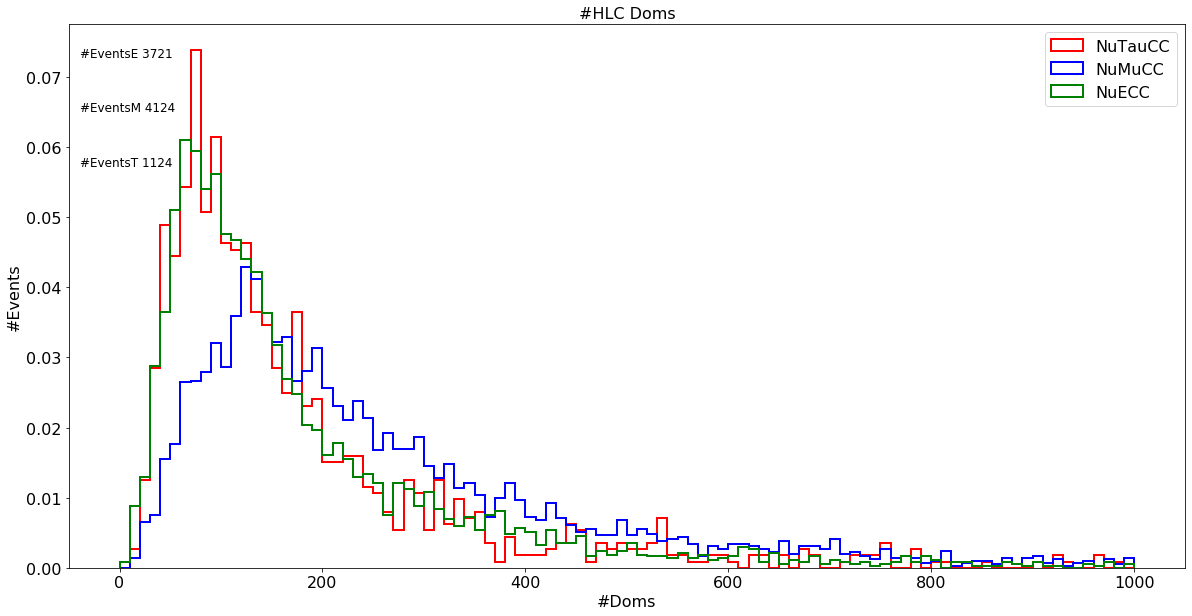

In [85]:
Plot("#HLC Doms","#Doms",data_t['hlc'][:,0],data_m['hlc'][:,0],data_e['hlc'][:,0])

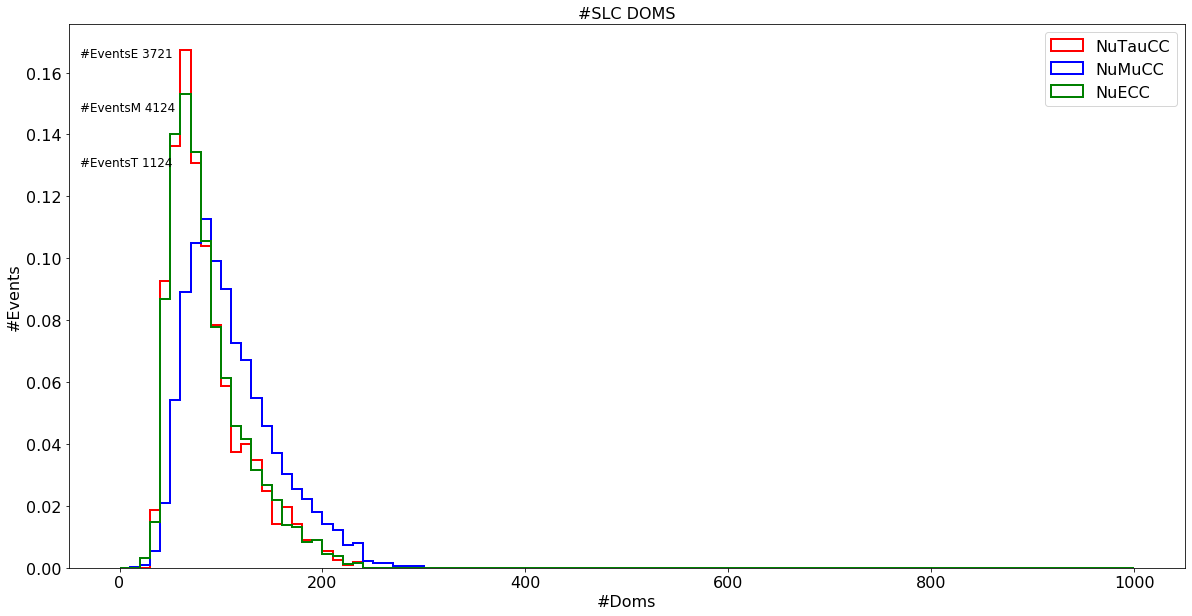

In [86]:
Plot("#SLC DOMS","#Doms",data_t['slc'][:,0],data_m['slc'][:,0],data_e['slc'][:,0])

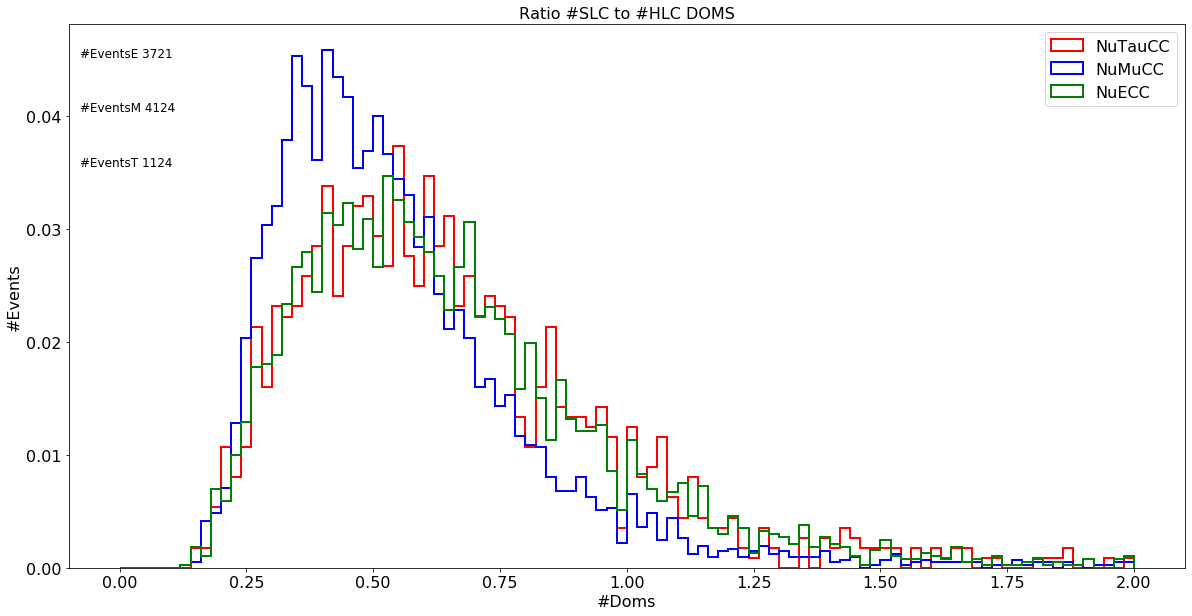

In [90]:
Plot("Ratio #SLC to #HLC DOMS","#Doms",data_t['slc'][:,0]/data_t['hlc'][:,0],data_m['slc'][:,0]/data_m['hlc'][:,0],data_e['slc'][:,0]/data_e['hlc'][:,0], r=[0,2])

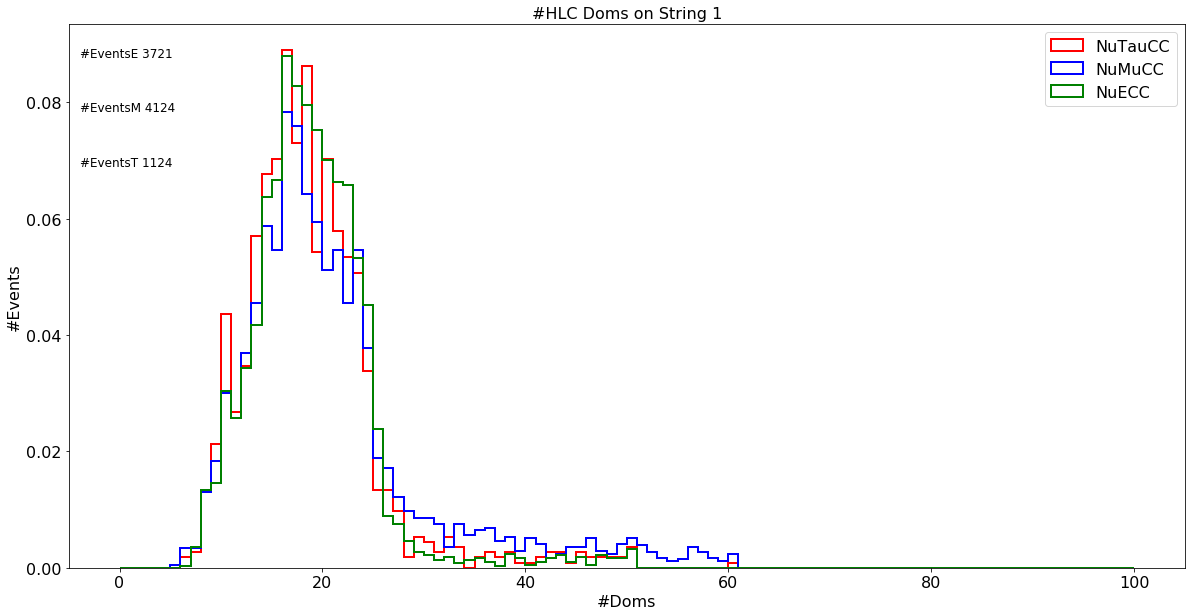

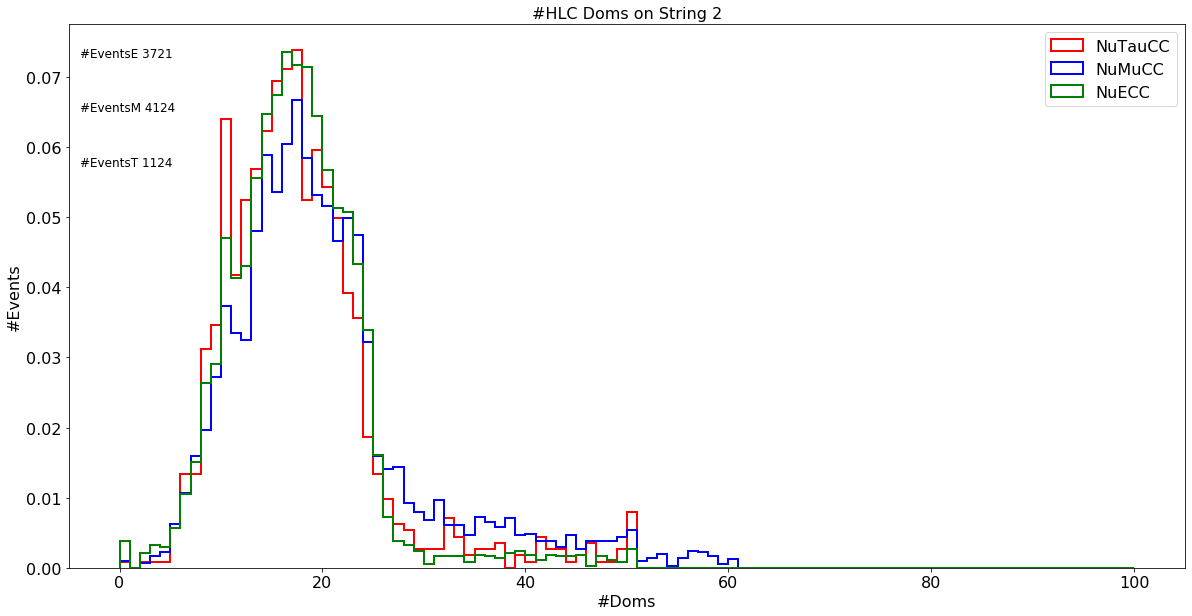

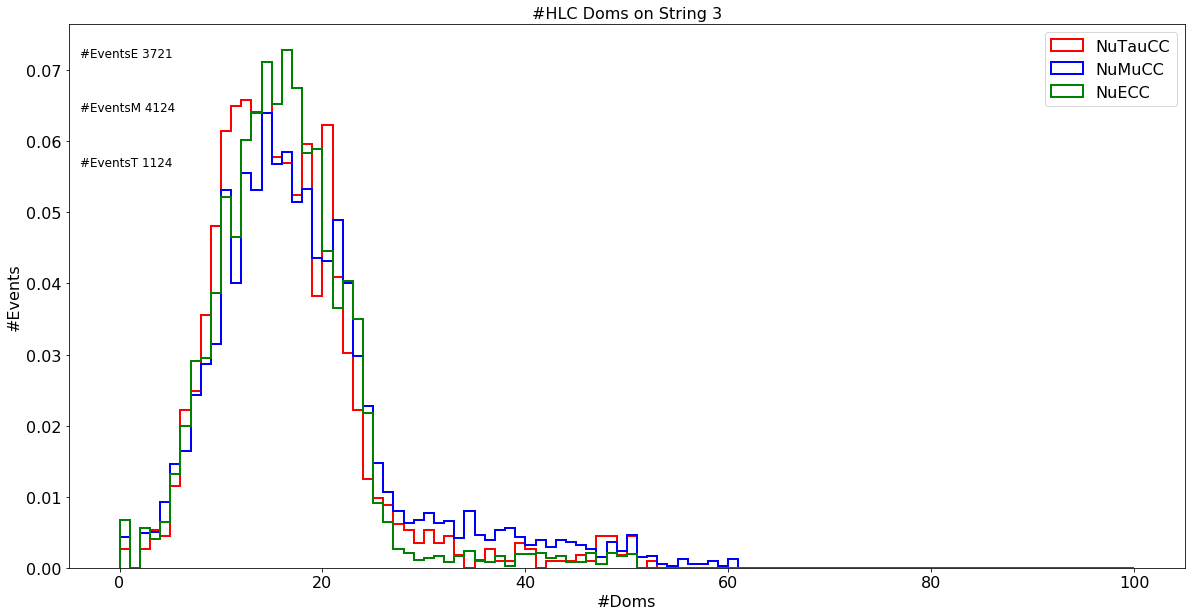

In [102]:
Plot("#HLC Doms on String 1","#Doms",data_t['st_hlc'][:,0,0],data_m['st_hlc'][:,0,0],data_e['st_hlc'][:,0,0],r=[0,100])
Plot("#HLC Doms on String 2","#Doms",data_t['st_hlc'][:,0,1],data_m['st_hlc'][:,0,1],data_e['st_hlc'][:,0,1],r=[0,100])
Plot("#HLC Doms on String 3","#Doms",data_t['st_hlc'][:,0,2],data_m['st_hlc'][:,0,2],data_e['st_hlc'][:,0,2],r=[0,100])

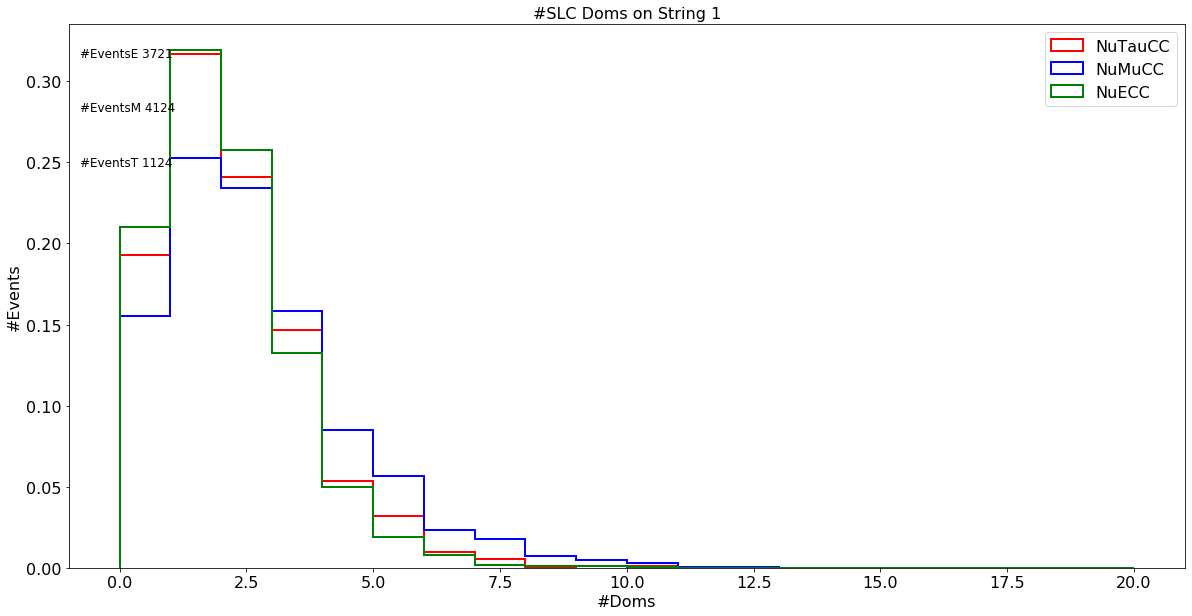

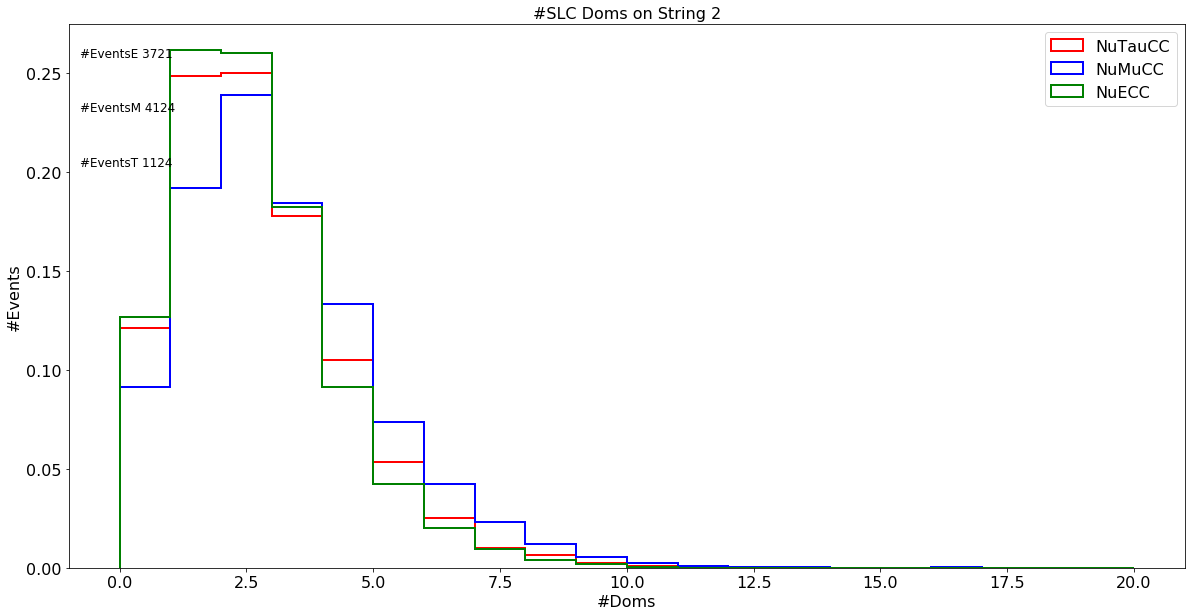

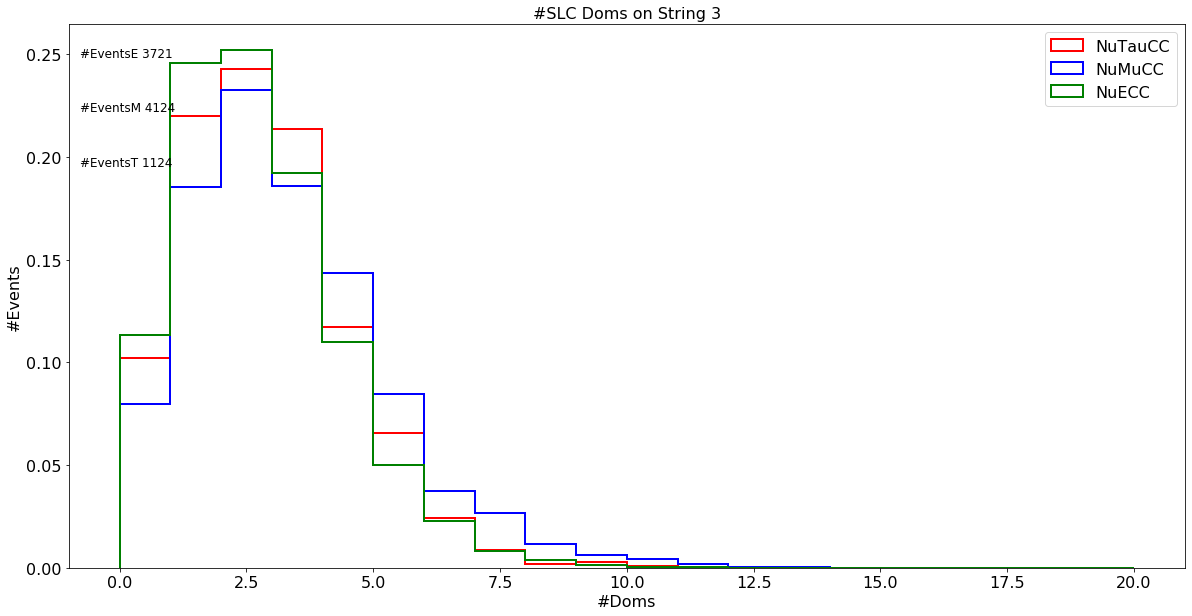

In [101]:
Plot("#SLC Doms on String 1","#Doms",data_t['st_slc'][:,0,0],data_m['st_slc'][:,0,0],data_e['st_slc'][:,0,0],r=[0,20],b=20)
Plot("#SLC Doms on String 2","#Doms",data_t['st_slc'][:,0,1],data_m['st_slc'][:,0,1],data_e['st_slc'][:,0,1],r=[0,20],b=20)
Plot("#SLC Doms on String 3","#Doms",data_t['st_slc'][:,0,2],data_m['st_slc'][:,0,2],data_e['st_slc'][:,0,2],r=[0,20],b=20)

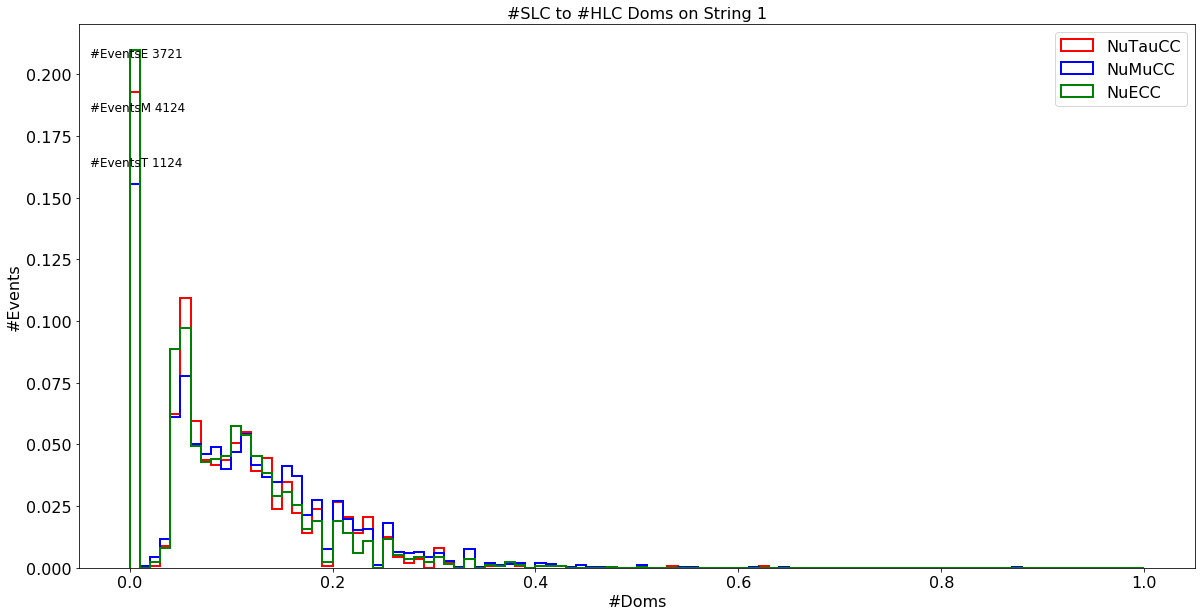

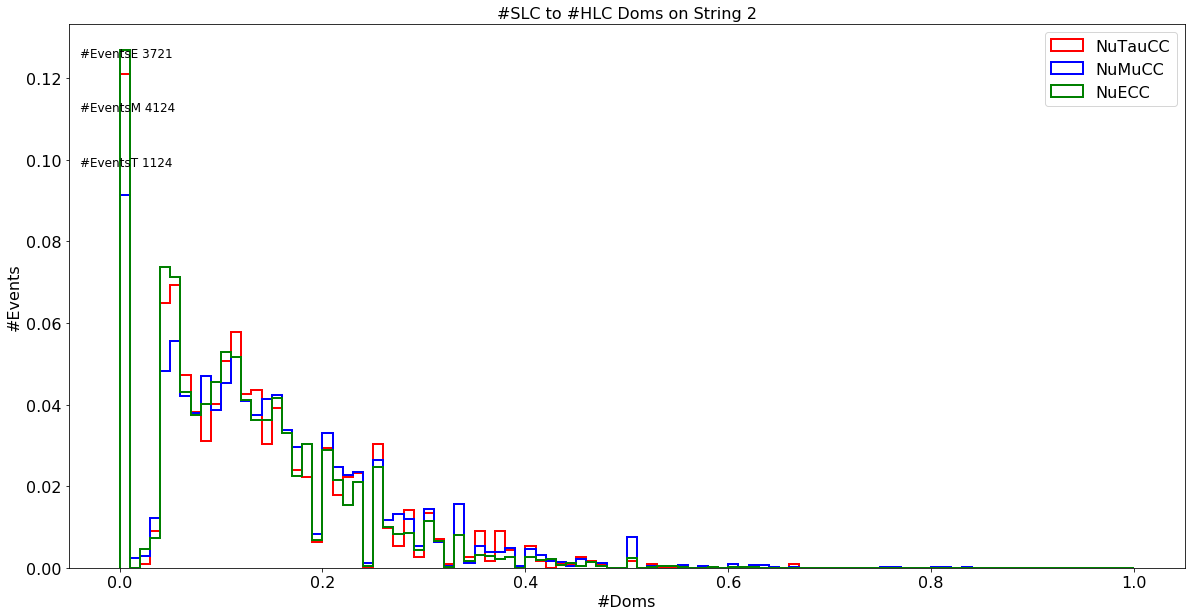

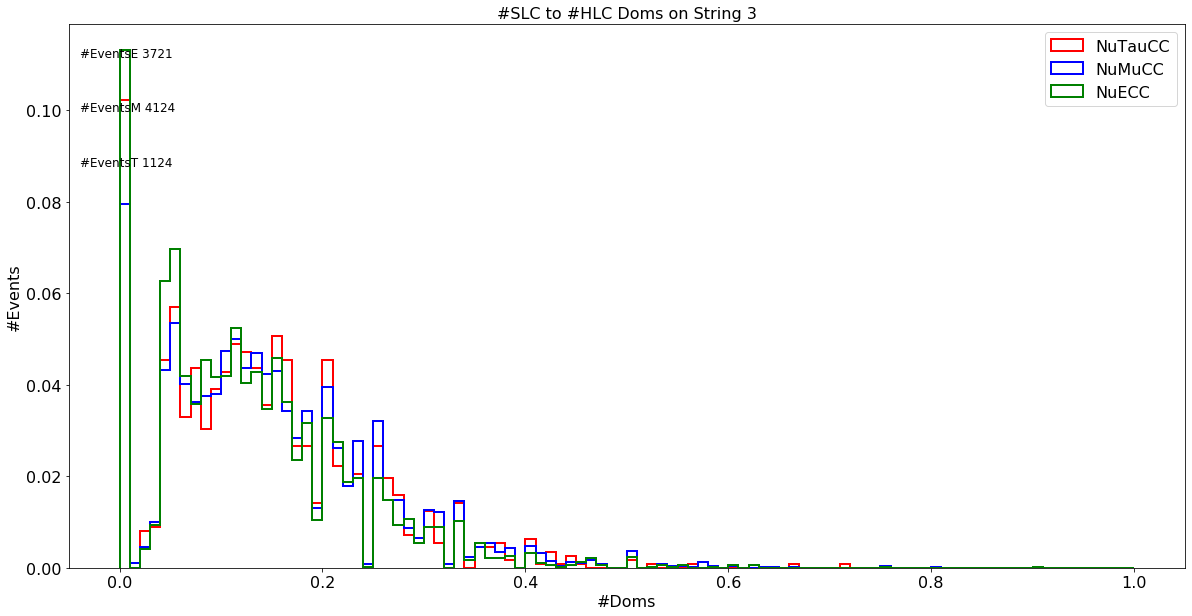

In [105]:
Plot("#SLC to #HLC Doms on String 1","#Doms",data_t['st_slc'][:,0,0]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,0]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,0]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)
Plot("#SLC to #HLC Doms on String 2","#Doms",data_t['st_slc'][:,0,1]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,1]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,1]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)
Plot("#SLC to #HLC Doms on String 3","#Doms",data_t['st_slc'][:,0,2]/data_t['st_hlc'][:,0,0],data_m['st_slc'][:,0,2]/data_m['st_hlc'][:,0,0],data_e['st_slc'][:,0,2]/data_e['st_hlc'][:,0,0],r=[0,1],b=100)

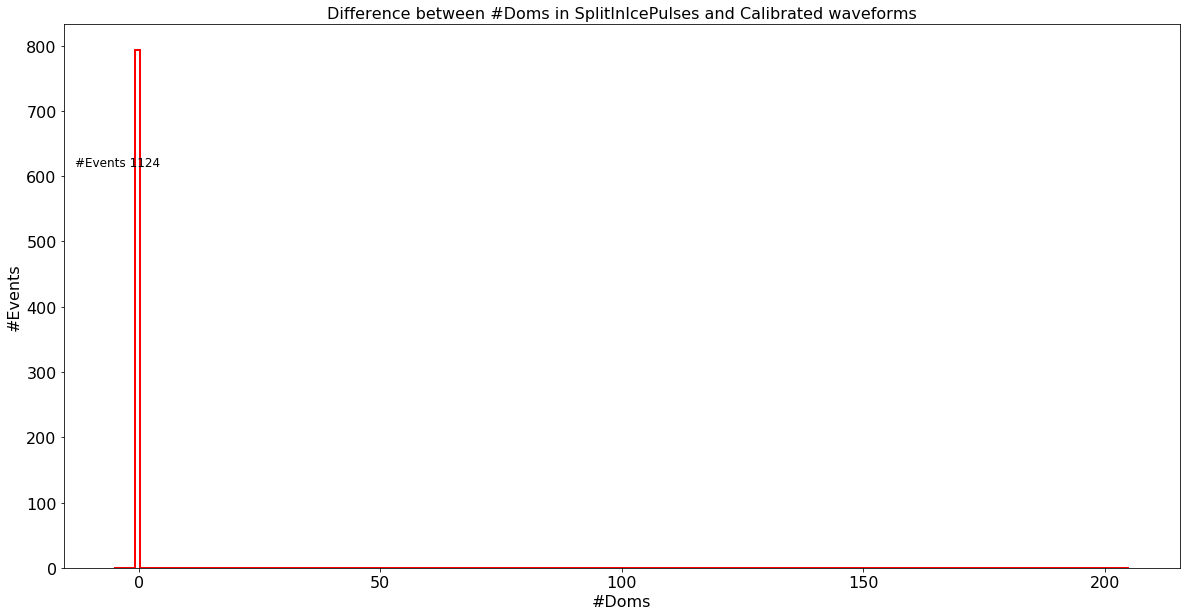

In [17]:
Plot("Difference between #Doms in SplitInIcePulses and Calibrated waveforms","#Doms",(data['pulses']-data['cal']).flatten(),r=[-5,205],b=200)

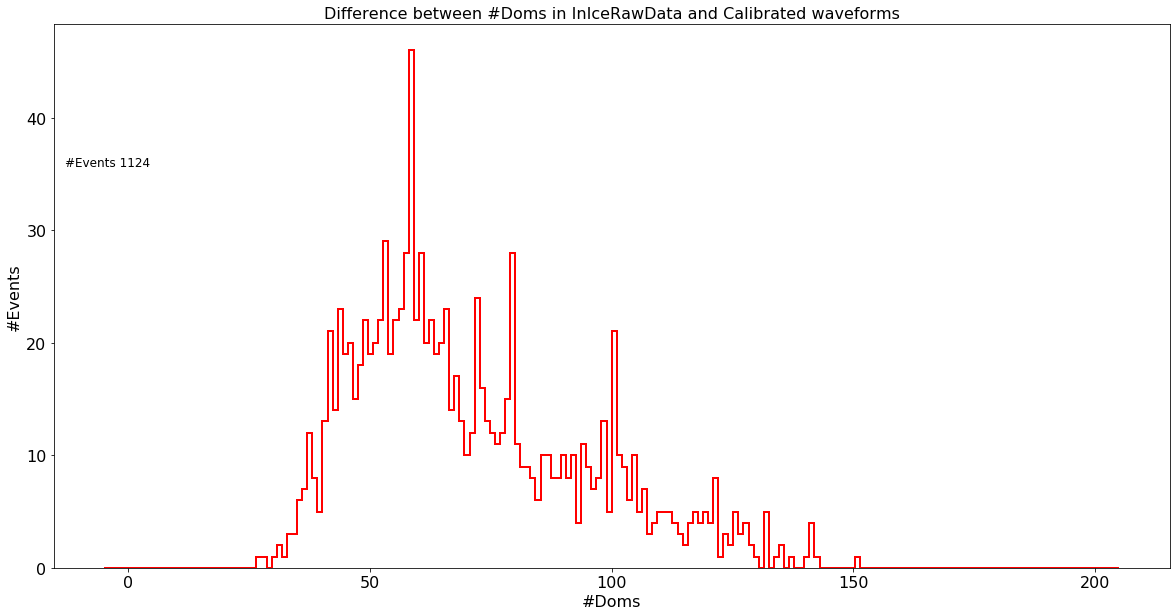

In [29]:
Plot("Difference between #Doms in InIceRawData and Calibrated waveforms","#Doms",data[:,1]-data[:,2],r=[-5,205],b=200)

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in true_divide
  
/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


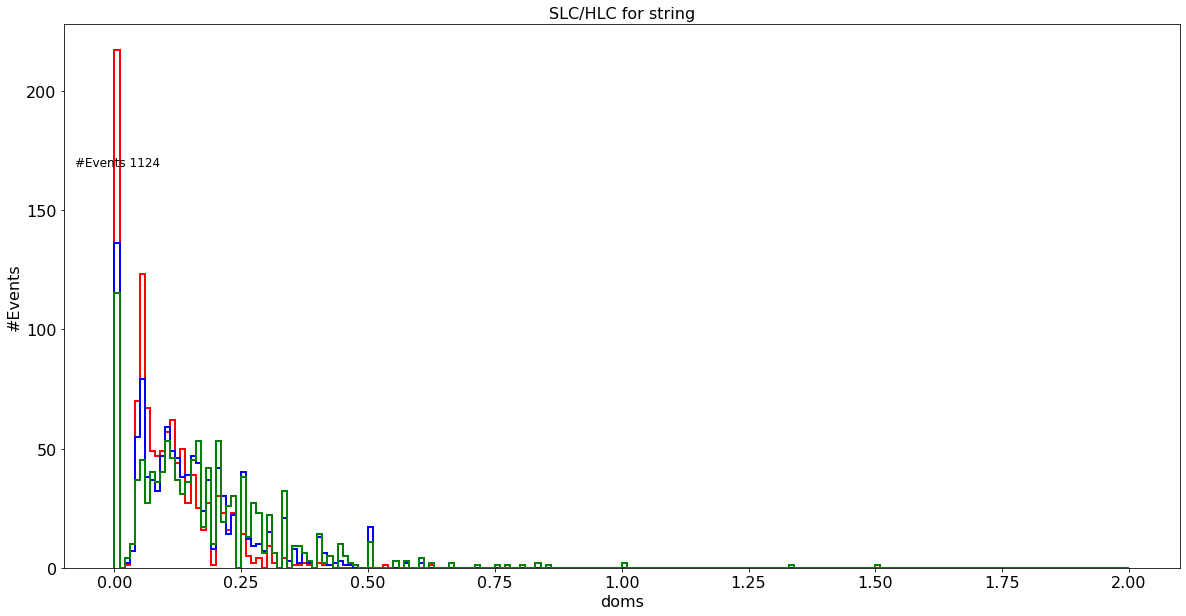

In [40]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("SLC/HLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,2]
b=200
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_slc'][:,0,0]/data['st_hlc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_slc'][:,0,1]/data['st_hlc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_slc'][:,0,2]/data['st_hlc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

#plt.legend(loc=loc)
plt.show()

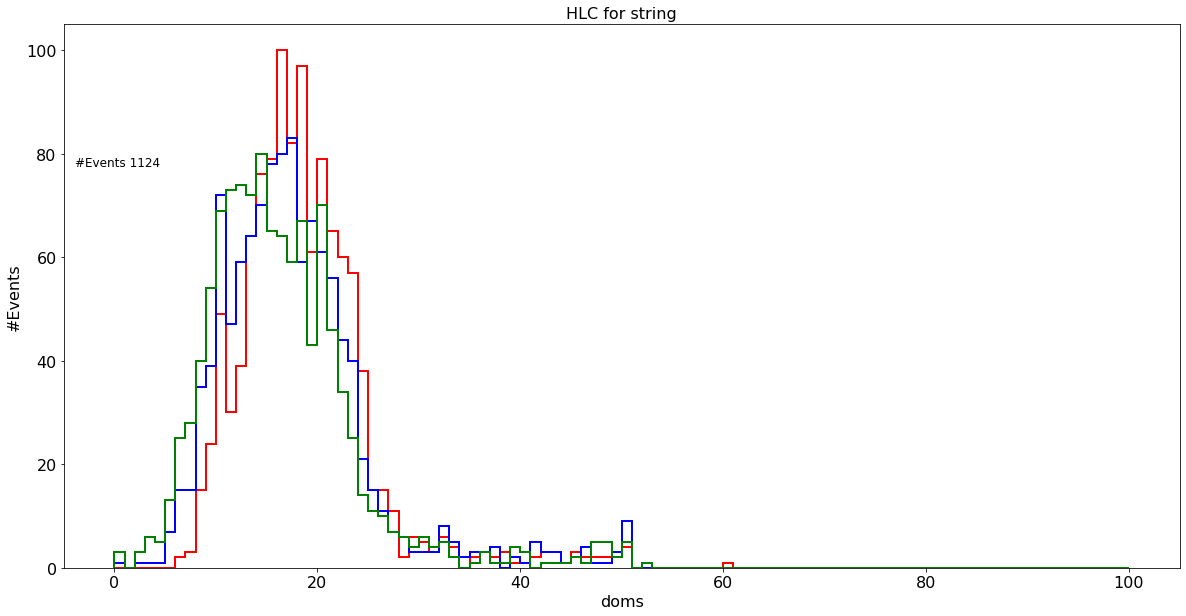

In [37]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("HLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,100]
b=100
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_hlc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_hlc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_hlc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

#plt.legend(loc=loc)
plt.show()

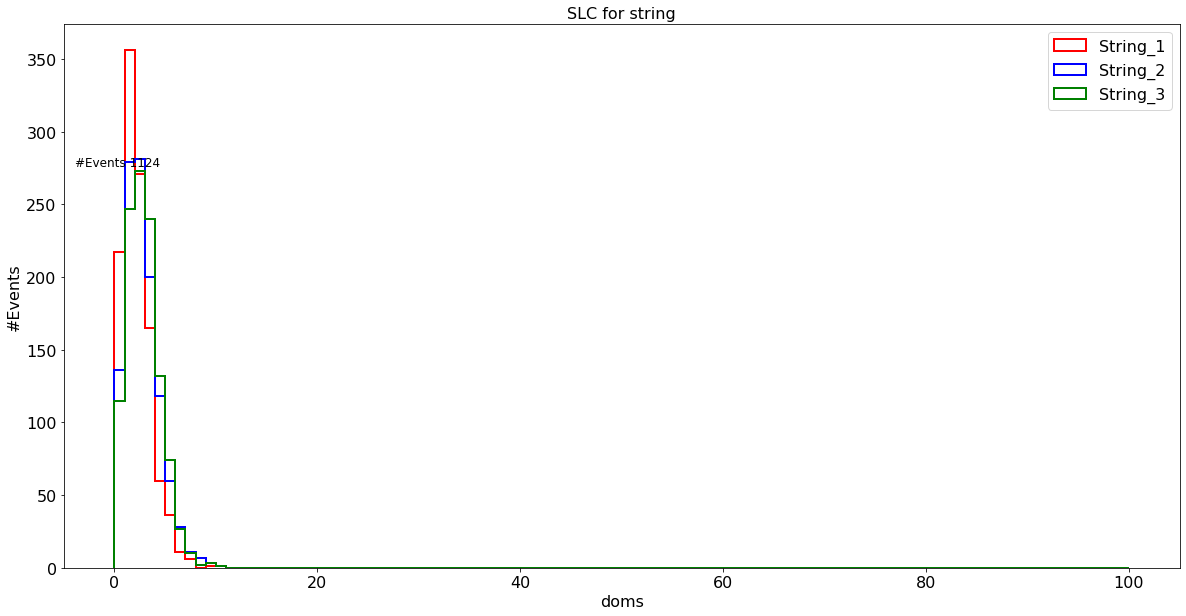

In [46]:
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
#ax.set_xscale('')
#ax.set_yscale('log')
ax.set_title("SLC for string", fontsize = 16)
ax.text(0.01,0.74,'#Events '+str(len(data)), transform=ax.transAxes, color = "black",fontsize=12)
r =[0,100]
b=100
ax.set_xlabel('doms', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data['st_slc'][:,0,0], bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "String_1")  
ax.hist(data['st_slc'][:,0,1], bins =b, histtype = 'step',edgecolor ='b', lw =2, range =r, label = "String_2")  
ax.hist(data['st_slc'][:,0,2], bins =b, histtype = 'step',edgecolor ='g', lw =2, range =r, label = "String_3")  

plt.legend()
plt.show()